In [15]:
import pandas as pd
from stock import Stock, MA_pair

# importing matplotlib module 
from matplotlib import pyplot as plt

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
#https://medium.com/codex/how-to-calculate-bollinger-bands-of-a-stock-with-python-f9f7d1184fc3

In [72]:
bot = Stock('MSFT',time_period='7mo')
bot.stock_data

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2021-11-04,330.825906,334.453268,327.466859,334.353882,23992200,0.0,0
1,1,2021-11-05,336.411047,336.689310,332.346412,333.976227,22570100,0.0,0
2,2,2021-11-08,335.208588,335.556424,332.366336,334.900513,20897000,0.0,0
3,3,2021-11-09,335.019755,336.619788,332.455765,333.866974,21307400,0.0,0
4,4,2021-11-10,332.495514,332.555140,327.874353,328.748871,25500900,0.0,0
...,...,...,...,...,...,...,...,...,...
141,141,2022-05-27,268.480011,273.339996,267.559998,273.239990,26910800,0.0,0
142,142,2022-05-31,272.529999,274.769989,268.929993,271.869995,37827700,0.0,0
143,143,2022-06-01,275.200012,277.690002,270.040009,272.420013,25292200,0.0,0
144,144,2022-06-02,264.450012,274.649994,261.600006,274.579987,44008200,0.0,0


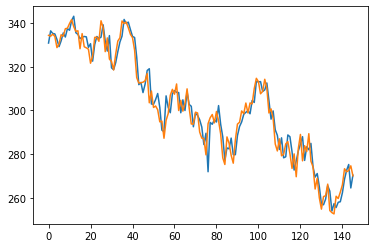

In [73]:
plt.plot(bot.stock_data['Open'])
plt.plot(bot.stock_data['Close'])

In [74]:
bot.get_sma_(t=50)
bot.get_sma_(t=200)
bot.get_cma_()
bot.get_ema_(t=50)
bot.get_ema_(t=200)

Got 50 day SMA.
Got 200 day SMA.
Got  CMA.
Got 50 day EMA.
Got 200 day EMA.


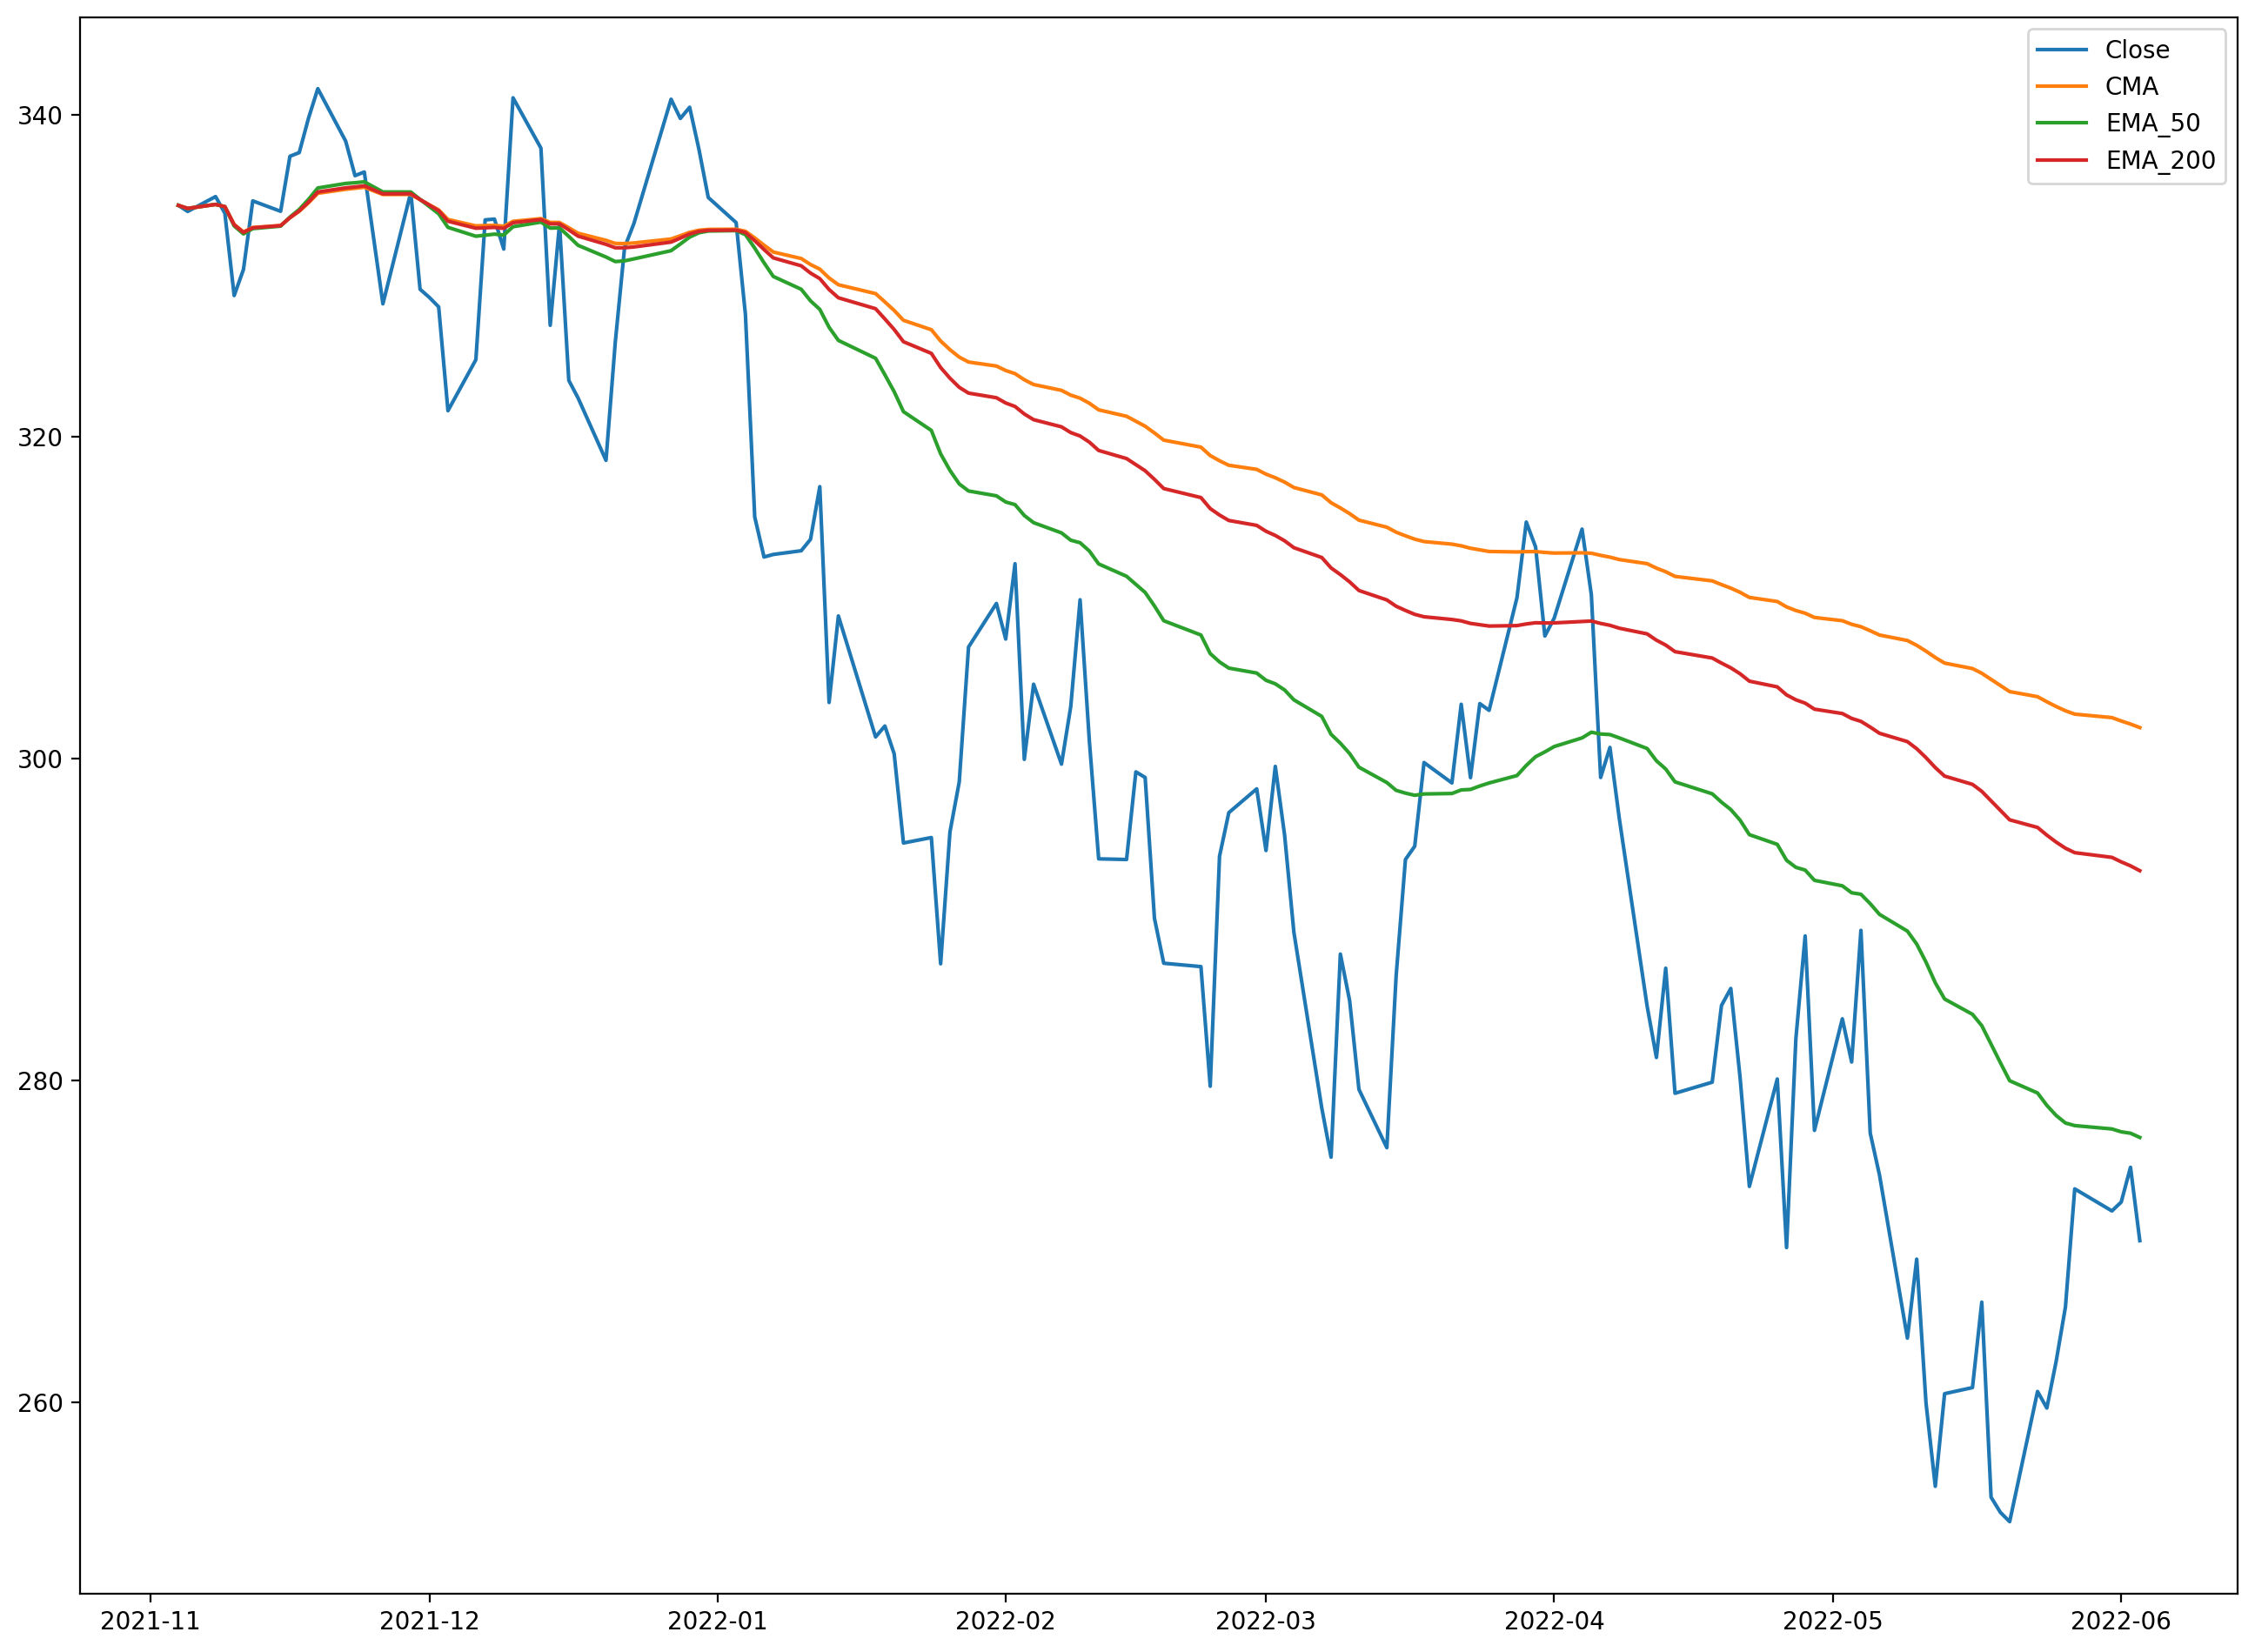

In [75]:
plt.figure(figsize=(16, 12), dpi=200)
cols_to_plot = ['Close', 'CMA', 'EMA_50','EMA_200']
for col in cols_to_plot:
    plt.plot( bot.stock_data['Date'], bot.stock_data[col], label=col)
plt.legend()

In [76]:
#price_hist.index[0] + pd.Timedelta(days=1)

In [77]:
test_pair = MA_pair('SMA', 50, 200)

In [78]:
bot.get_xs_(test_pair, 'DOWN')

Getting X_SMA_50_200_DOWN intersects
I already have 50 day SMA.
I already have 200 day SMA.


In [79]:
bot.get_xs_(MA_pair('EMA', 50, 200), 'DOWN')
bot.get_xs_(MA_pair('EMA', 20, 50), 'DOWN')
bot.get_xs_(MA_pair('EMA', 10, 50), 'DOWN')

Getting X_EMA_50_200_DOWN intersects
I already have 50 day EMA.
I already have 200 day EMA.
Getting X_EMA_20_50_DOWN intersects
Got 20 day EMA.
I already have 50 day EMA.
Getting X_EMA_10_50_DOWN intersects
Got 10 day EMA.
I already have 50 day EMA.


In [80]:
bot.ma_xs

defaultdict(list,
            {'X_SMA_50_200_DOWN': Empty DataFrame
             Columns: [index, Date, Open, High, Low, Close, Volume, Dividends, Stock Splits, SMA_50, SMA_200, CMA, EMA_50, EMA_200]
             Index: [],
             'X_EMA_50_200_DOWN':    index       Date        Open        High         Low       Close    Volume  \
             0      1 2021-11-05  336.411047  336.689310  332.346412  333.976227  22570100   
             1      3 2021-11-09  335.019755  336.619788  332.455765  333.866974  21307400   
             2     18 2021-12-01  333.661341  337.793148  327.946505  328.633453  33337600   
             
                Dividends  Stock Splits      SMA_50  SMA_200         CMA      EMA_50  \
             0        0.0             0         NaN      NaN  334.165054  334.161278   
             1        0.0             0         NaN      NaN  334.274399  334.271584   
             2        0.0             0  329.422466      NaN  334.388836  334.276170   
             

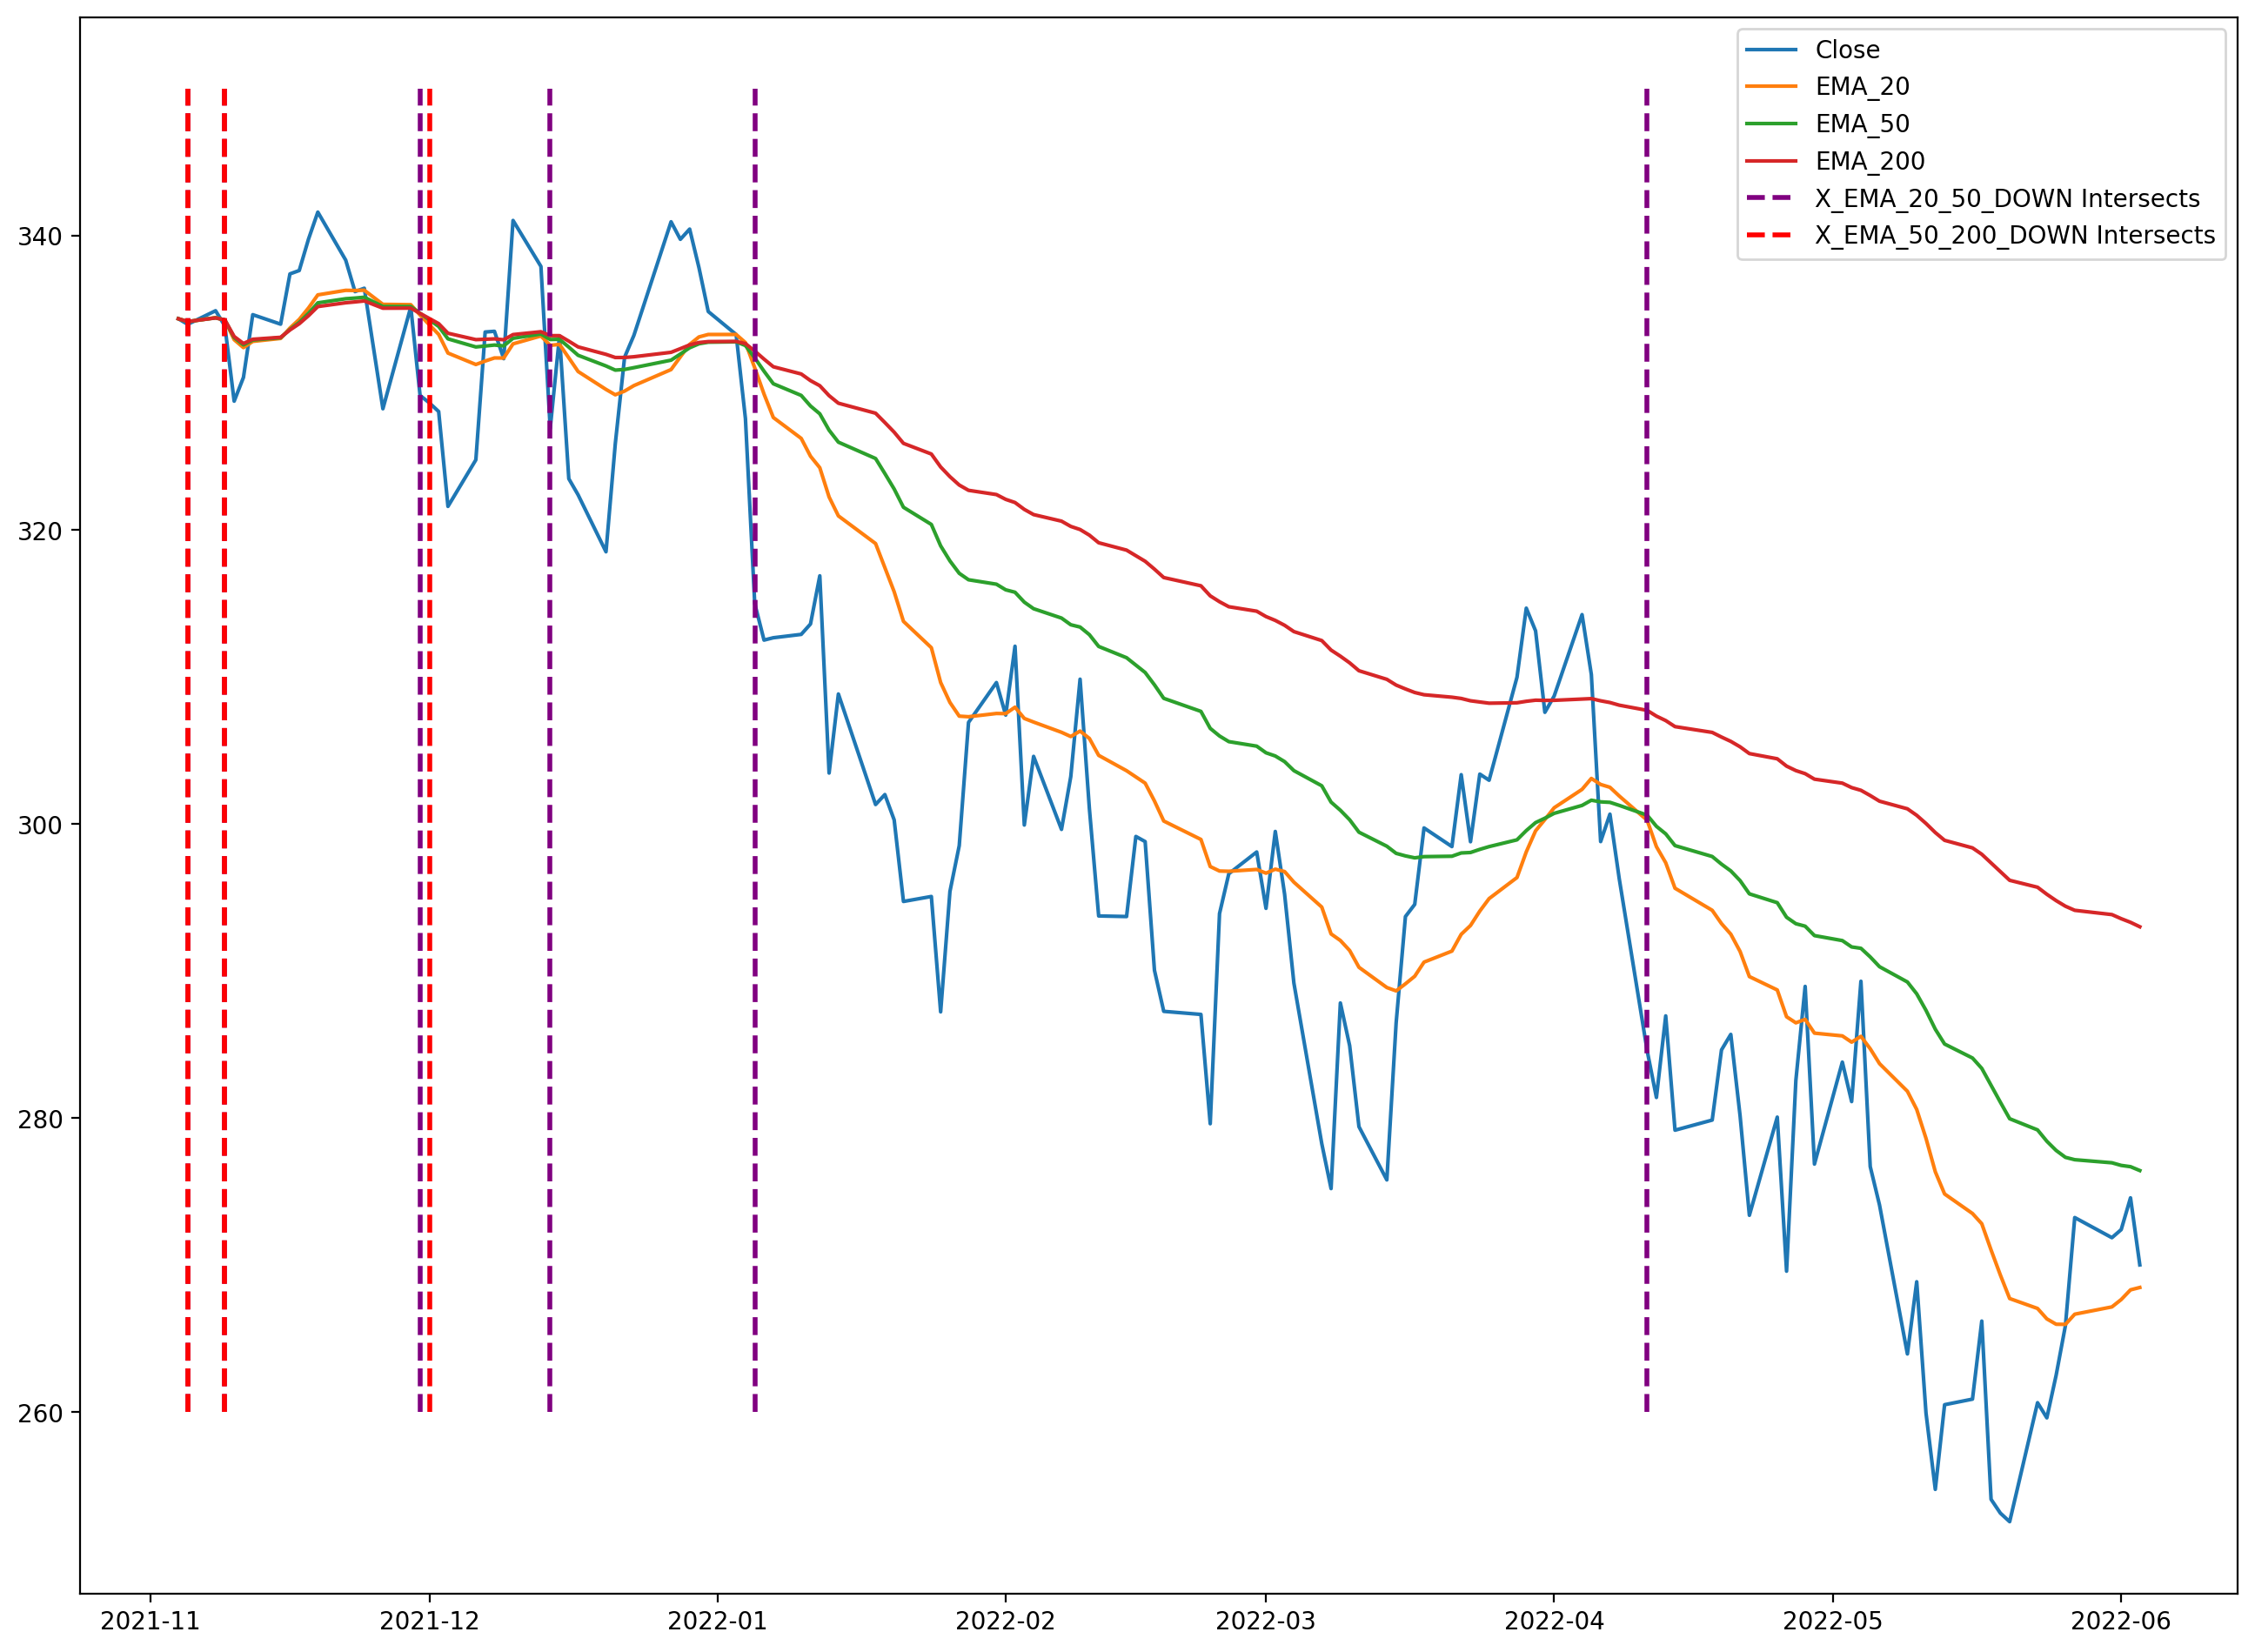

In [85]:
x_name = 'X_EMA_20_50_DOWN'
plt.figure(figsize=(16, 12), dpi=200)
cols_to_plot = ['Close', 'EMA_20','EMA_50', 'EMA_200']
for col in cols_to_plot:
    plt.plot(bot.stock_data['Date'], bot.stock_data[col], label=col)
xs = [bot.ma_xs['X_EMA_10_50_DOWN'].iloc[idx]['Date'] for idx in range(len(bot.ma_xs['X_EMA_10_50_DOWN']))]
plt.vlines(x=xs, ymin=260, ymax=350, colors='purple', ls='--', lw=2, label='X_EMA_20_50_DOWN Intersects')
xs = [bot.ma_xs['X_EMA_50_200_DOWN'].iloc[idx]['Date'] for idx in range(len(bot.ma_xs['X_EMA_50_200_DOWN']))]
plt.vlines(x=xs, ymin=260, ymax=350, colors='red', ls='--', lw=2, label='X_EMA_50_200_DOWN Intersects')
plt.legend()

### SMA logic

Red dashed lines are 50_x_200, purple are 10_x_50
From the graph above we can think of some rules:
1. Purple line means that the stock will be dropping for one day, stock is dropping in the short-term
2. Iff the red line is recently preceded by a purple line, that means the stock will be dropping in the long term (i.e. the lines near 2021-12, the purple lines shows short-term movement and if followed by the red line that short-term movement turns into long-term movement)

### Correctly shows the downward interections in 2019 and right now.